# ASSORBIMENTO PbS 2000

Misura dell'assorbimento del PbS 2000 in tre diverse concentrazioni

In [17]:
concentrazioni = ['0e1mg_ml', '1mg_ml', '5mg_ml']

Fare caso al fatto che fit_N_gaussiane prende in argomento il numero di acquisizioni! Il motivo è spiegato bene nella docstring. In breve: serve a correggere con un senso l'errore poissoniano!

## Importazioni

In [18]:
from qp2_subroutines import *
import os

In [19]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

Nomi dei file

In [20]:
def build_name_PbS_abs (conc: str = None):
    # t_acq == 0e25
    # n_acq == 5
    # grating == 35lmm
    # ecc ==1064
    # filtro == 0e5pc
    
    cartella = 'data/PbS2000_assorbimento/'
    name = 'QD_PbS2000_' + conc + '_Abs.txt'
    
    return cartella+name

In [21]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

---

---

# Analisi

## ASSORBIMENTO PbS su CONCENTRAZIONE

#### Contenitore per i dati

In [22]:
# dictionary GaSb
# le keys saranno i filtri
# ciascuna key conterrà le due colonne del file:
# GaSb[filtro][0] - colonna 0 del file (lunghezze d'onda)
# GaSb[filtro][1] - colonna 1 del file (counts)

PbS_T = {}

#### Lettura file

In [23]:
for conc in concentrazioni:
    
    # Costruisco nome file
    name = build_name_PbS_abs (conc=conc)
    # Estraggo i dati 
    waveln, counts = leggi_file_assorbimento (name)
    # Pulisco i counts da valori insensati
    counts = clean_counts_assorbimento (counts, n=1, n_primi=100, n_ultimi=100)
    # Raccolgo
    PbS_T[conc] = (waveln, counts)

/Users/zosojack/lab-ss/QP2/qp2_subroutines.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(nomefile, delim_whitespace=True, skiprows=19, header=None, on_bad_lines='skip')
/Users/zosojack/lab-ss/QP2/qp2_subroutines.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(nomefile, delim_whitespace=True, skiprows=19, header=None, on_bad_lines='skip')
/Users/zosojack/lab-ss/QP2/qp2_subroutines.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(nomefile, delim_whitespace=True, skiprows=19, header=None, on_bad_lines='skip')


#### Plot su concentrazione

Per il fit è sufficiente un fit gaussiano in ciascuna regione interessata:

In [24]:
regioni = [(1280,1390), (1460,1600), (1930,2090)]

In [25]:
# per un giochino sul cambio lampada tra 1600 e 1800
oplà = [0.0004, 0.01, 0.095]

• Gaussiana  1
 - A = 0.002228629089873011
 - mu = 1319.4781620537012
 - sigma = 78.59240421163787
 - chi2rid = 0.0003631530236648354
• Gaussiana  2
 - A = 0.002382480877529032
 - mu = 1515.8869665771645
 - sigma = 96.243063240256
 - chi2rid = 0.00030136342317679457
• Gaussiana  3
 - A = 0.002439244583764274
 - mu = 1989.1289813782996
 - sigma = 44.93395515154481
 - chi2rid = 0.0028096805262898287


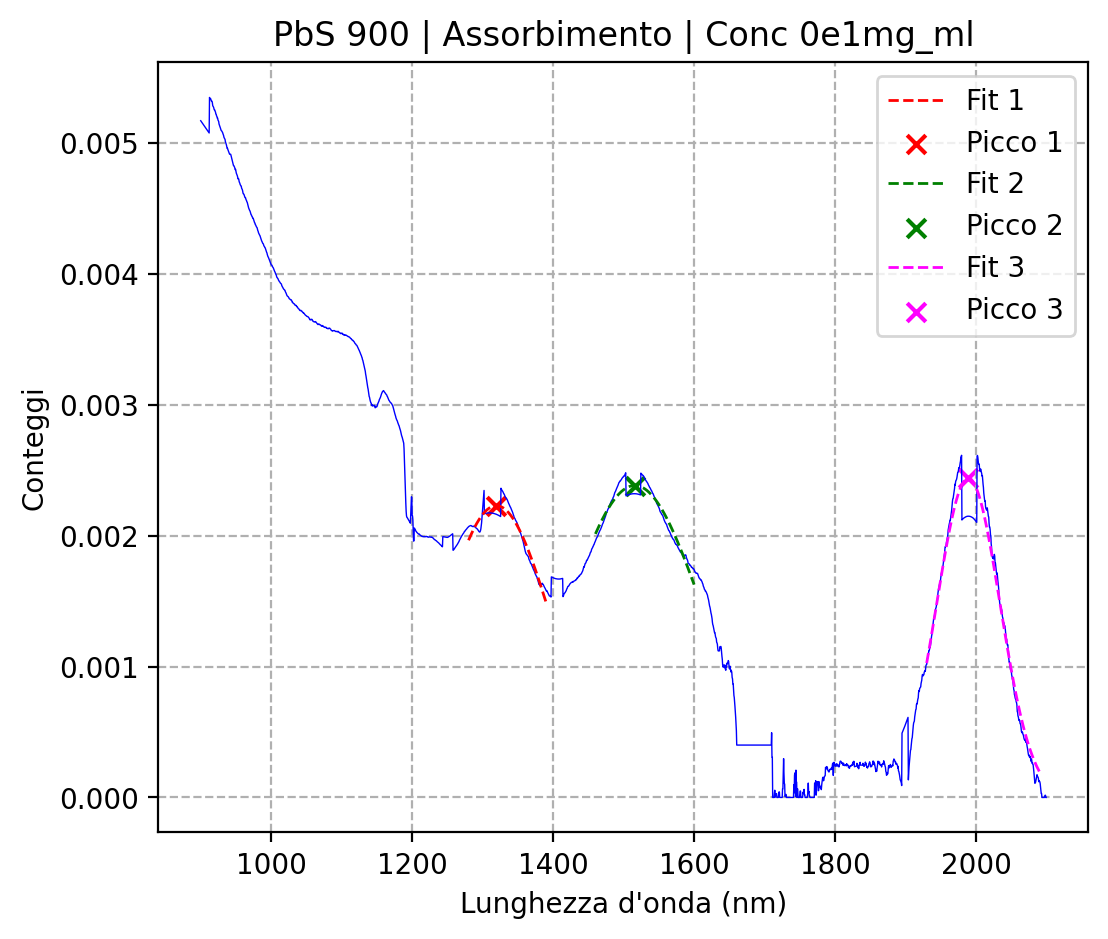

• Gaussiana  1
 - A = 0.02948206517648646
 - mu = 1315.434980771557
 - sigma = 97.63184425544556
 - chi2rid = 0.001742305933733568
• Gaussiana  2
 - A = 0.029239476378587335
 - mu = 1527.901226419028
 - sigma = 84.4624664945719
 - chi2rid = 0.003139860266945209
• Gaussiana  3
 - A = 0.032132695282710406
 - mu = 2005.8746685074873
 - sigma = 46.50194334207765
 - chi2rid = 0.025456671639671698


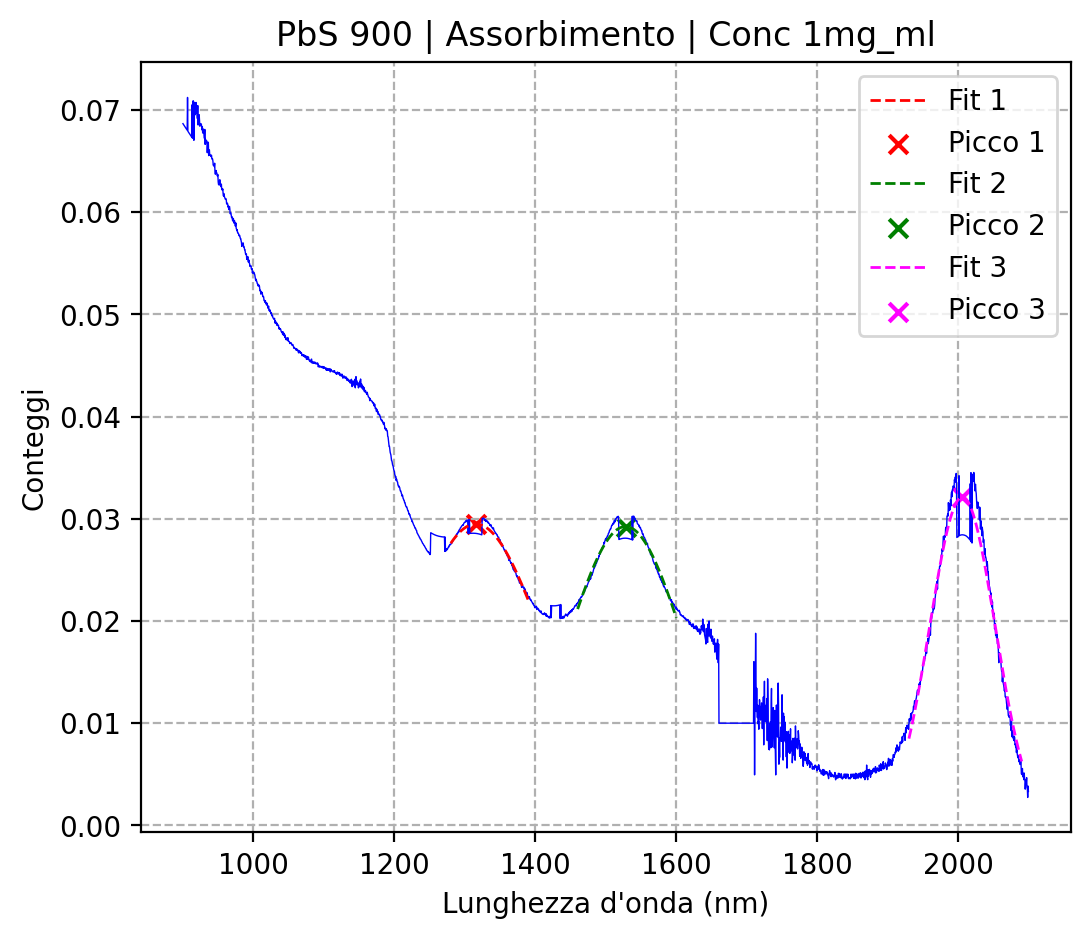

• Gaussiana  1
 - A = 0.16435254366564367
 - mu = 1316.6765077804619
 - sigma = 101.90048616161177
 - chi2rid = 0.0008753695191483417
• Gaussiana  2
 - A = 0.1623313433949937
 - mu = 1532.2985257607916
 - sigma = 84.88226134588196
 - chi2rid = 0.007148579588313312
• Gaussiana  3
 - A = 0.17709216744253983
 - mu = 2010.2813235236288
 - sigma = 46.19293833522191
 - chi2rid = 0.06768248929504334


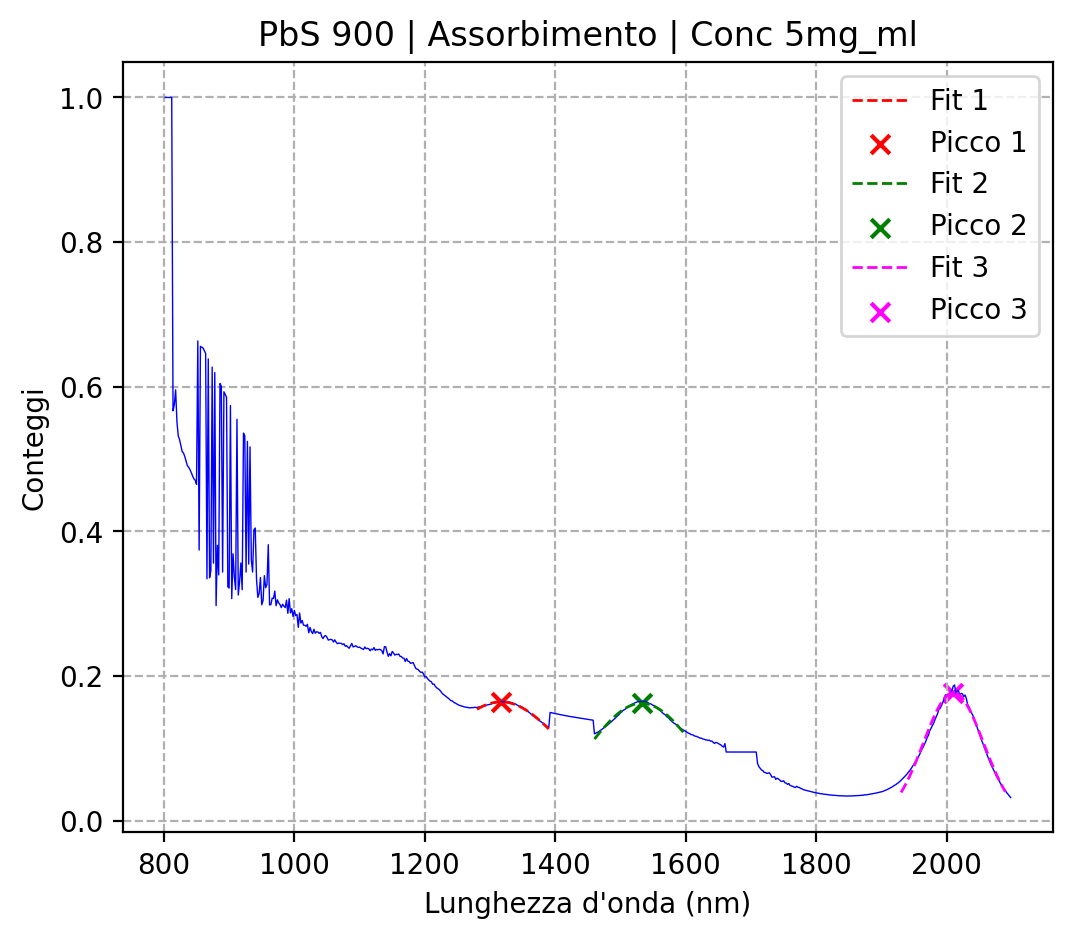

In [26]:
for i, conc in enumerate(concentrazioni):
    
    ## PULIZIA DEI COUNTS ##
    waveln = PbS_T[conc][0]
    counts = PbS_T[conc][1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum
    
    # isolo regione incriminata
    mask = (waveln > 1660) & (waveln < 1710)
    indici = np.where(mask)[0] # indici della maschera 
    # pongo tutti gli elementi in questa regione uguali a un valore fisso
    counts[indici] = oplà[i]
    # isolo plot 800 < x < 2100?
    mask = (waveln > 800) & (waveln < 2100)
    waveln = waveln[mask]
    counts = counts[mask]
    
    ### PLOT E FIT ###

    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5)#, zorder=1)
    
    ## UN FIT PER CIASCUNA REGIONE ##
    for j, regione in enumerate(regioni):
        # isolo regione
        mask = (waveln > regione[0]) & (waveln < regione[1])
        x_fit = waveln[mask]
        y_fit = counts[mask]
    
        # imposto parametri: ogni entrata è una tripla (a, mu, sigma)
        punto_medio = (regione[0] + regione[1]) / 2
        params = np.array([0.03, punto_medio, 60])
        
        # Set dei bounds per i parametri
        low = [0.0001, regione[0], 10]   # Limiti inferiori 
        upp = [1, regione[1], 200]       # Limiti superiori
    
        popt, pcov = curve_fit(gaussiana, x_fit, y_fit, p0=params, bounds=(low,upp))
        
        ## PLOT CURVA FIT ##
        x_plot = np.linspace(regione[0], regione[1], 200)
        y_plot = gaussiana(x_plot, *popt)
        plt.plot(x_plot, y_plot, linestyle='--', color=col[j], label=f"Fit {j+1}", linewidth=1)#, zorder=2)
    
        # plotto anche i picchi individuati dal fit
        x_picco = popt[1]
        y_picco = gaussiana(x_picco, *popt)
        plt.scatter(x_picco, y_picco, 
                    color=col[j], marker='x',
                    label='Picco '+str(j+1), s=45)
       
        ## CALCOLO CHI2 ##
        chi2, dof = chi2_gaussiana(x_fit, y_fit, popt)
        
        ## PRINT RISULTATI FIT ##
        print('• Gaussiana ', j+1)
        print(' - A =', popt[0])
        print(' - mu =', popt[1])
        print(' - sigma =', popt[2])
        print(' - chi2rid =', chi2/dof)

    ## OPZIONI GRAFICHE ##
    plt.title(r'PbS 900 | Assorbimento | Conc ' +  conc)
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    #plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()

Quest'ultimo dovrebbe essere l'unico attendibile: l'unico senza picco troncato. La forma a cavatappi dei picchi potrebbe essere causato da saturazione del segnale?